In [1]:
import anndata
import muon as mu
import pandas as pd
import scanpy as sc
import scirpy as ir
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import warnings
warnings.filterwarnings('ignore')

/home/plattner/.conda/envs/2024_MCB_chapter/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load data

### Load TCR sequencing data:

In [2]:
adata_tcr = ir.io.read_airr("data/RhapTCRBCRdemo/RhapTCRBCRdemo_VDJ_Dominant_Contigs_AIRR.tsv")

### Load corresponding transcriptomics data:

In [3]:
adata = sc.read_h5ad("data/RhapTCRBCRdemo/RhapTCRBCRdemo.h5ad")

adata

AnnData object with n_obs × n_vars = 7212 × 33470
    obs: 'Cell_Type_Experimental', 'Sample_Tag', 'Sample_Name', 'SampleTag01_hs_Read_Count', 'SampleTag02_hs_Read_Count', 'SampleTag03_hs_Read_Count', 'SampleTag04_hs_Read_Count', 'SampleTag05_hs_Read_Count', 'SampleTag06_hs_Read_Count', 'SampleTag07_hs_Read_Count', 'SampleTag08_hs_Read_Count', 'SampleTag09_hs_Read_Count', 'SampleTag10_hs_Read_Count', 'SampleTag11_hs_Read_Count', 'SampleTag12_hs_Read_Count', 'Total_VDJ_Read_Count', 'Total_VDJ_Molecule_Count', 'BCR_Heavy_V_gene_Dominant', 'BCR_Heavy_D_gene_Dominant', 'BCR_Heavy_J_gene_Dominant', 'BCR_Heavy_C_gene_Dominant', 'BCR_Heavy_CDR3_Nucleotide_Dominant', 'BCR_Heavy_CDR3_Translation_Dominant', 'BCR_Heavy_Read_Count', 'BCR_Heavy_Molecule_Count', 'BCR_Light_V_gene_Dominant', 'BCR_Light_J_gene_Dominant', 'BCR_Light_C_gene_Dominant', 'BCR_Light_CDR3_Nucleotide_Dominant', 'BCR_Light_CDR3_Translation_Dominant', 'BCR_Light_Read_Count', 'BCR_Light_Molecule_Count', 'TCR_Alpha_Gamma_V_gene_D

### List AbSeq proteins

In [4]:
pd.DataFrame([x.split('|')[:3] for x in adata.var.index[adata.var.index.str.endswith("pAbO")]], columns=['Antibody', 'GeneSymbol', 'SeqID'])

,Antibody,GeneSymbol,SeqID
0,CCR7,CCR7,AHS0273
1,CD11b:M1_70,ITGAM,AHS0005
2,CD11c:B-LY6,ITGAX,AHS0056
3,CD127,IL7R,AHS0028
4,CD134:ACT35,TNFRSF4,AHS0013
5,CD137,TNFRSF9,AHS0003
6,CD14:MPHIP9,CD14,AHS0037
7,CD161:HP-3G10,KLRB1,AHS0205
8,CD16:3G8,FCGR3A,AHS0053
9,CD183,CXCR3,AHS0031


## Show tSNE embeddings

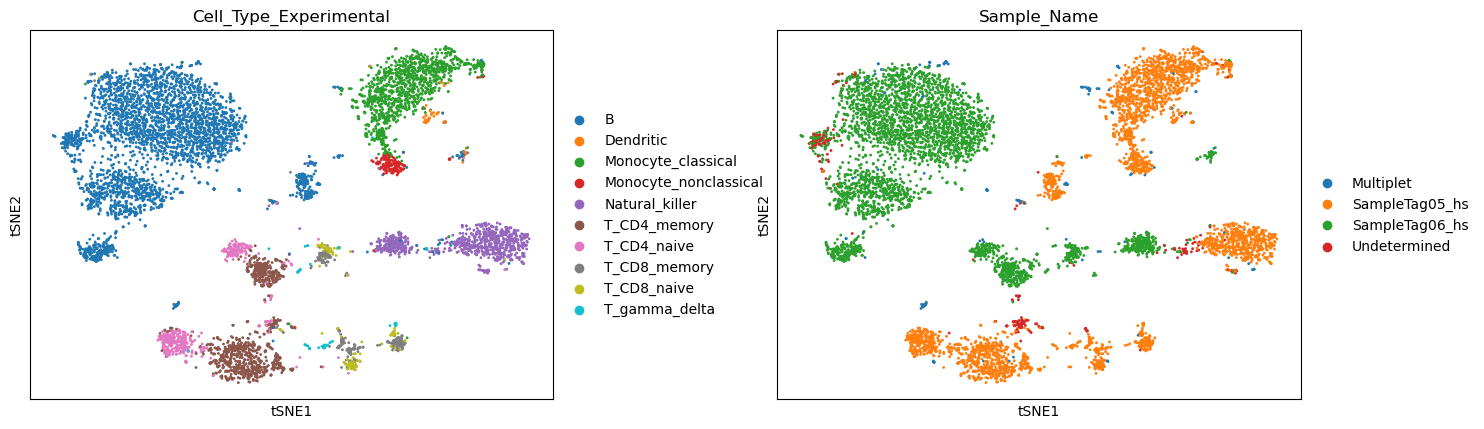

In [5]:
sc.pl.tsne(adata, color=["Cell_Type_Experimental", "Sample_Name"], wspace=0.3)

### Remove multiplets and undetermined cells:

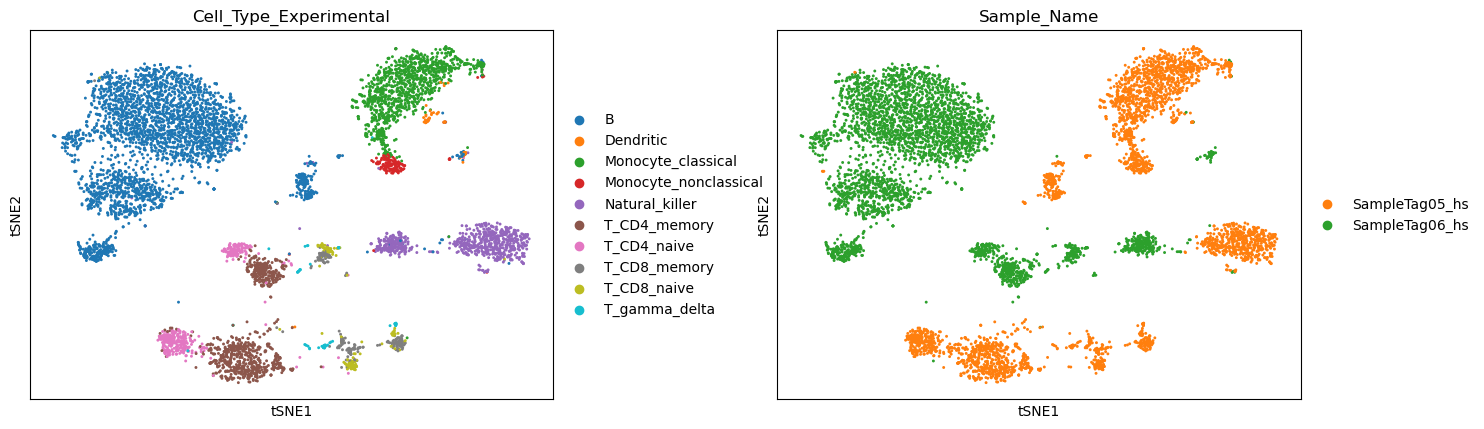

In [6]:
# Filter
adata = adata[~adata.obs["Sample_Name"].isin(["Multiplet", "Undetermined"])].copy()

# Show filtered
sc.pl.tsne(adata, color=["Cell_Type_Experimental", "Sample_Name"], wspace=0.3)

### Store both data types in a single MuData objectwith

`gex` = gene expression data 
`airr` = immune receptor data

In [7]:
mdata = mu.MuData({"gex": adata, "airr": adata_tcr})

mdata

MuData object with n_obs × n_vars = 7087 × 33470
  2 modalities
    gex:	6823 x 33470
      obs:	'Cell_Type_Experimental', 'Sample_Tag', 'Sample_Name', 'SampleTag01_hs_Read_Count', 'SampleTag02_hs_Read_Count', 'SampleTag03_hs_Read_Count', 'SampleTag04_hs_Read_Count', 'SampleTag05_hs_Read_Count', 'SampleTag06_hs_Read_Count', 'SampleTag07_hs_Read_Count', 'SampleTag08_hs_Read_Count', 'SampleTag09_hs_Read_Count', 'SampleTag10_hs_Read_Count', 'SampleTag11_hs_Read_Count', 'SampleTag12_hs_Read_Count', 'Total_VDJ_Read_Count', 'Total_VDJ_Molecule_Count', 'BCR_Heavy_V_gene_Dominant', 'BCR_Heavy_D_gene_Dominant', 'BCR_Heavy_J_gene_Dominant', 'BCR_Heavy_C_gene_Dominant', 'BCR_Heavy_CDR3_Nucleotide_Dominant', 'BCR_Heavy_CDR3_Translation_Dominant', 'BCR_Heavy_Read_Count', 'BCR_Heavy_Molecule_Count', 'BCR_Light_V_gene_Dominant', 'BCR_Light_J_gene_Dominant', 'BCR_Light_C_gene_Dominant', 'BCR_Light_CDR3_Nucleotide_Dominant', 'BCR_Light_CDR3_Translation_Dominant', 'BCR_Light_Read_Count', 'BCR_Light_Molecule_Count', 'TCR_Alpha_Gamma_V_gene_Dominant', 'TCR_Alpha_Gamma_J_gene_Dominant', 'TCR_Alpha_Gamma_C_gene_Dominant', 'TCR_Alpha_Gamma_CDR3_Nucleotide_Dominant', 'TCR_Alpha_Gamma_CDR3_Translation_Dominant', 'TCR_Alpha_Gamma_Read_Count', 'TCR_Alpha_Gamma_Molecule_Count', 'TCR_Beta_Delta_V_gene_Dominant', 'TCR_Beta_Delta_D_gene_Dominant', 'TCR_Beta_Delta_J_gene_Dominant', 'TCR_Beta_Delta_C_gene_Dominant', 'TCR_Beta_Delta_CDR3_Nucleotide_Dominant', 'TCR_Beta_Delta_CDR3_Translation_Dominant', 'TCR_Beta_Delta_Read_Count', 'TCR_Beta_Delta_Molecule_Count', 'BCR_Paired_Chains', 'TCR_Paired_Chains'
      var:	'Raw_Reads', 'Raw_Molecules', 'Raw_Seq_Depth', 'RSEC_Adjusted_Molecules', 'RSEC_Adjusted_Reads_non-singleton', 'RSEC_Adjusted_Molecules_non-singleton'
      uns:	'Pipeline_Inputs', 'Pipeline_Metrics', 'Cell_Type_Experimental_colors', 'Sample_Name_colors'
      obsm:	'X_tsne'
    airr:	4590 x 0
      uns:	'scirpy_version'
      obsm:	'airr'

### Keep only cells which are present in both modalities:

In [8]:
mu.pp.intersect_obs(mdata)

mdata

MuData object with n_obs × n_vars = 4326 × 33470
  2 modalities
    gex:	4326 x 33470
      obs:	'Cell_Type_Experimental', 'Sample_Tag', 'Sample_Name', 'SampleTag01_hs_Read_Count', 'SampleTag02_hs_Read_Count', 'SampleTag03_hs_Read_Count', 'SampleTag04_hs_Read_Count', 'SampleTag05_hs_Read_Count', 'SampleTag06_hs_Read_Count', 'SampleTag07_hs_Read_Count', 'SampleTag08_hs_Read_Count', 'SampleTag09_hs_Read_Count', 'SampleTag10_hs_Read_Count', 'SampleTag11_hs_Read_Count', 'SampleTag12_hs_Read_Count', 'Total_VDJ_Read_Count', 'Total_VDJ_Molecule_Count', 'BCR_Heavy_V_gene_Dominant', 'BCR_Heavy_D_gene_Dominant', 'BCR_Heavy_J_gene_Dominant', 'BCR_Heavy_C_gene_Dominant', 'BCR_Heavy_CDR3_Nucleotide_Dominant', 'BCR_Heavy_CDR3_Translation_Dominant', 'BCR_Heavy_Read_Count', 'BCR_Heavy_Molecule_Count', 'BCR_Light_V_gene_Dominant', 'BCR_Light_J_gene_Dominant', 'BCR_Light_C_gene_Dominant', 'BCR_Light_CDR3_Nucleotide_Dominant', 'BCR_Light_CDR3_Translation_Dominant', 'BCR_Light_Read_Count', 'BCR_Light_Molecule_Count', 'TCR_Alpha_Gamma_V_gene_Dominant', 'TCR_Alpha_Gamma_J_gene_Dominant', 'TCR_Alpha_Gamma_C_gene_Dominant', 'TCR_Alpha_Gamma_CDR3_Nucleotide_Dominant', 'TCR_Alpha_Gamma_CDR3_Translation_Dominant', 'TCR_Alpha_Gamma_Read_Count', 'TCR_Alpha_Gamma_Molecule_Count', 'TCR_Beta_Delta_V_gene_Dominant', 'TCR_Beta_Delta_D_gene_Dominant', 'TCR_Beta_Delta_J_gene_Dominant', 'TCR_Beta_Delta_C_gene_Dominant', 'TCR_Beta_Delta_CDR3_Nucleotide_Dominant', 'TCR_Beta_Delta_CDR3_Translation_Dominant', 'TCR_Beta_Delta_Read_Count', 'TCR_Beta_Delta_Molecule_Count', 'BCR_Paired_Chains', 'TCR_Paired_Chains'
      var:	'Raw_Reads', 'Raw_Molecules', 'Raw_Seq_Depth', 'RSEC_Adjusted_Molecules', 'RSEC_Adjusted_Reads_non-singleton', 'RSEC_Adjusted_Molecules_non-singleton'
      uns:	'Pipeline_Inputs', 'Pipeline_Metrics', 'Cell_Type_Experimental_colors', 'Sample_Name_colors'
      obsm:	'X_tsne'
    airr:	4326 x 0
      uns:	'scirpy_version'
      obsm:	'airr'

## Filtering and preprocessing of the transcriptomics data

### Filter low quality reads and low quality cells:

In [9]:
sc.pp.filter_genes(mdata["gex"], min_cells=10)
sc.pp.filter_cells(mdata["gex"], min_genes=100)

### Perform a simplified preprocessing workflow. For further information on preprocessing and clustering

please visit https://www.sc-best-practices.org/preamble.html for details and guidelines to more sophisticated preprocessing

In [10]:
sc.pp.normalize_total(mdata["gex"])
sc.pp.log1p(mdata["gex"])

sc.pp.highly_variable_genes(mdata["gex"], n_top_genes=5000)
sc.tl.pca(mdata["gex"])
sc.pp.neighbors(mdata["gex"])

### Update the MuData object to integrate the changes:

In [11]:
mdata.update()

## TCR preprocessing and quality control

### 1. Create chain indices

In [12]:
ir.pp.index_chains(mdata)

### 2. Quality control

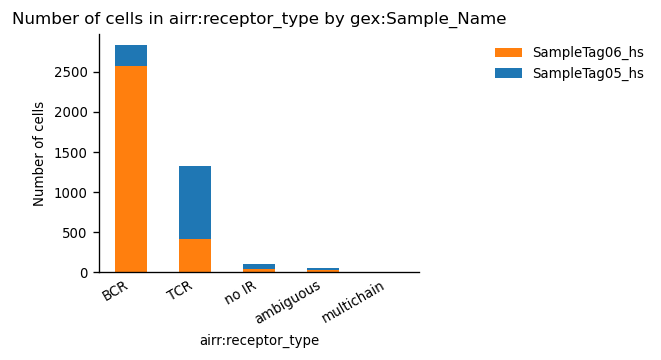

In [13]:
ir.tl.chain_qc(mdata)
_ = ir.pl.group_abundance(mdata, groupby="airr:receptor_type", target_col="gex:Sample_Name")

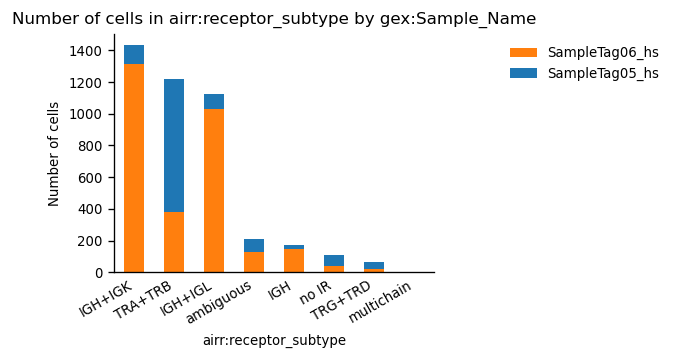

In [14]:
_ = ir.pl.group_abundance(mdata, groupby="airr:receptor_subtype", target_col="gex:Sample_Name")

### 3. Remove multichains

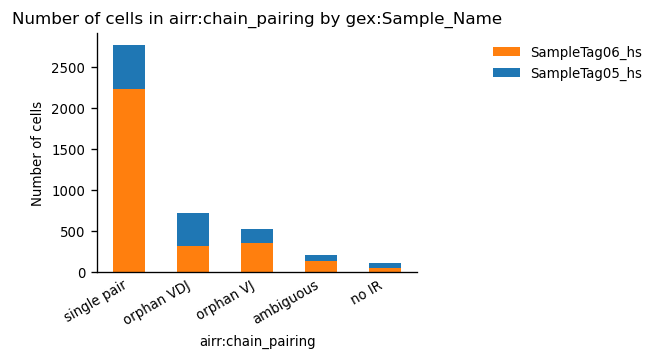

In [15]:
mu.pp.filter_obs(mdata, "airr:chain_pairing", lambda x: x != "multichain")

_ = ir.pl.group_abundance(mdata, groupby="airr:chain_pairing", target_col="gex:Sample_Name")

In [16]:
mu.pp.filter_obs(mdata, "airr:chain_pairing", lambda x: x == "single pair")

### 4. Filter for T-cells:

In [17]:
mu.pp.filter_obs(mdata, "gex:Cell_Type_Experimental", lambda x: np.isin(x, ["T_CD4_memory", "T_CD4_naive", "T_CD8_memory", "T_CD8_naive", "T_gamma_delta"]))

## Define clonotypes

### 1. Calculate distances based on the nucleic acid sequence identity:

In [18]:
ir.pp.ir_dist(mdata, metric='identity', sequence='nt')
ir.tl.define_clonotypes(mdata, receptor_arms="all", dual_ir="primary_only")

100%|██████████| 477/477 [00:00<00:00, 877.32it/s]


### 2. Compute layout and visualize network:

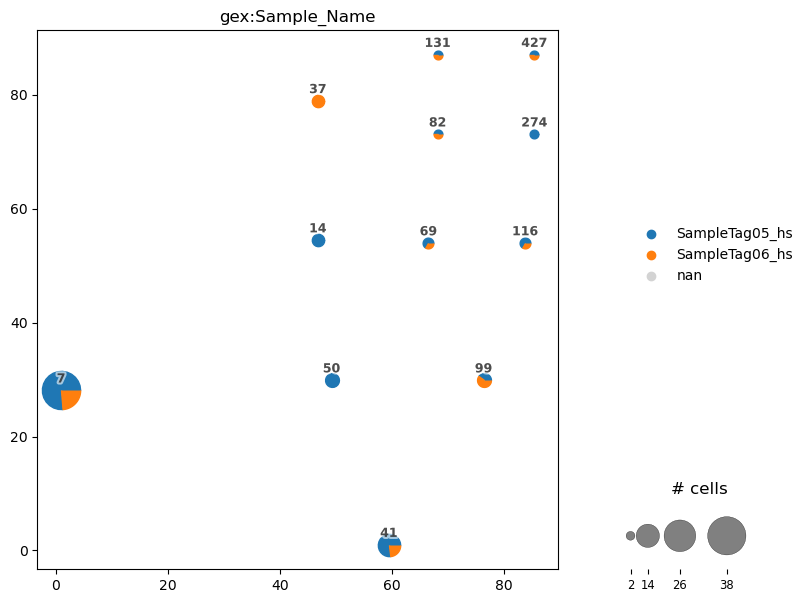

In [19]:
ir.tl.clonotype_network(mdata, min_cells=2)
_ = ir.pl.clonotype_network(mdata, color="gex:Sample_Name", base_size=20, label_fontsize=9, panel_size=(7, 7))

## Define clonotype clusters

In [20]:
mdata

MuData object with n_obs × n_vars = 548 × 19556
  2 modalities
    gex:	548 x 19556
      obs:	'Cell_Type_Experimental', 'Sample_Tag', 'Sample_Name', 'SampleTag01_hs_Read_Count', 'SampleTag02_hs_Read_Count', 'SampleTag03_hs_Read_Count', 'SampleTag04_hs_Read_Count', 'SampleTag05_hs_Read_Count', 'SampleTag06_hs_Read_Count', 'SampleTag07_hs_Read_Count', 'SampleTag08_hs_Read_Count', 'SampleTag09_hs_Read_Count', 'SampleTag10_hs_Read_Count', 'SampleTag11_hs_Read_Count', 'SampleTag12_hs_Read_Count', 'Total_VDJ_Read_Count', 'Total_VDJ_Molecule_Count', 'BCR_Heavy_V_gene_Dominant', 'BCR_Heavy_D_gene_Dominant', 'BCR_Heavy_J_gene_Dominant', 'BCR_Heavy_C_gene_Dominant', 'BCR_Heavy_CDR3_Nucleotide_Dominant', 'BCR_Heavy_CDR3_Translation_Dominant', 'BCR_Heavy_Read_Count', 'BCR_Heavy_Molecule_Count', 'BCR_Light_V_gene_Dominant', 'BCR_Light_J_gene_Dominant', 'BCR_Light_C_gene_Dominant', 'BCR_Light_CDR3_Nucleotide_Dominant', 'BCR_Light_CDR3_Translation_Dominant', 'BCR_Light_Read_Count', 'BCR_Light_Molecule_Count', 'TCR_Alpha_Gamma_V_gene_Dominant', 'TCR_Alpha_Gamma_J_gene_Dominant', 'TCR_Alpha_Gamma_C_gene_Dominant', 'TCR_Alpha_Gamma_CDR3_Nucleotide_Dominant', 'TCR_Alpha_Gamma_CDR3_Translation_Dominant', 'TCR_Alpha_Gamma_Read_Count', 'TCR_Alpha_Gamma_Molecule_Count', 'TCR_Beta_Delta_V_gene_Dominant', 'TCR_Beta_Delta_D_gene_Dominant', 'TCR_Beta_Delta_J_gene_Dominant', 'TCR_Beta_Delta_C_gene_Dominant', 'TCR_Beta_Delta_CDR3_Nucleotide_Dominant', 'TCR_Beta_Delta_CDR3_Translation_Dominant', 'TCR_Beta_Delta_Read_Count', 'TCR_Beta_Delta_Molecule_Count', 'BCR_Paired_Chains', 'TCR_Paired_Chains', 'n_genes'
      var:	'Raw_Reads', 'Raw_Molecules', 'Raw_Seq_Depth', 'RSEC_Adjusted_Molecules', 'RSEC_Adjusted_Reads_non-singleton', 'RSEC_Adjusted_Molecules_non-singleton', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'Pipeline_Inputs', 'Pipeline_Metrics', 'Cell_Type_Experimental_colors', 'Sample_Name_colors', 'log1p', 'hvg', 'pca', 'neighbors'
      obsm:	'X_tsne', 'X_pca'
      varm:	'PCs'
      obsp:	'distances', 'connectivities'
    airr:	548 x 0
      obs:	'receptor_type', 'receptor_subtype', 'chain_pairing', 'clone_id', 'clone_id_size'
      uns:	'scirpy_version', 'chain_indices', 'ir_dist_nt_identity', 'clone_id', 'clonotype_network'
      obsm:	'airr', 'chain_indices', 'X_clonotype_network'

In [21]:
ir.pp.ir_dist(mdata, metric="alignment", sequence="aa", cutoff=15)
ir.tl.define_clonotype_clusters(mdata, sequence="aa", metric="alignment", receptor_arms="all", dual_ir="any")

100%|██████████| 477/477 [00:01<00:00, 346.84it/s]


In [22]:
mdata

MuData object with n_obs × n_vars = 548 × 19556
  2 modalities
    gex:	548 x 19556
      obs:	'Cell_Type_Experimental', 'Sample_Tag', 'Sample_Name', 'SampleTag01_hs_Read_Count', 'SampleTag02_hs_Read_Count', 'SampleTag03_hs_Read_Count', 'SampleTag04_hs_Read_Count', 'SampleTag05_hs_Read_Count', 'SampleTag06_hs_Read_Count', 'SampleTag07_hs_Read_Count', 'SampleTag08_hs_Read_Count', 'SampleTag09_hs_Read_Count', 'SampleTag10_hs_Read_Count', 'SampleTag11_hs_Read_Count', 'SampleTag12_hs_Read_Count', 'Total_VDJ_Read_Count', 'Total_VDJ_Molecule_Count', 'BCR_Heavy_V_gene_Dominant', 'BCR_Heavy_D_gene_Dominant', 'BCR_Heavy_J_gene_Dominant', 'BCR_Heavy_C_gene_Dominant', 'BCR_Heavy_CDR3_Nucleotide_Dominant', 'BCR_Heavy_CDR3_Translation_Dominant', 'BCR_Heavy_Read_Count', 'BCR_Heavy_Molecule_Count', 'BCR_Light_V_gene_Dominant', 'BCR_Light_J_gene_Dominant', 'BCR_Light_C_gene_Dominant', 'BCR_Light_CDR3_Nucleotide_Dominant', 'BCR_Light_CDR3_Translation_Dominant', 'BCR_Light_Read_Count', 'BCR_Light_Molecule_Count', 'TCR_Alpha_Gamma_V_gene_Dominant', 'TCR_Alpha_Gamma_J_gene_Dominant', 'TCR_Alpha_Gamma_C_gene_Dominant', 'TCR_Alpha_Gamma_CDR3_Nucleotide_Dominant', 'TCR_Alpha_Gamma_CDR3_Translation_Dominant', 'TCR_Alpha_Gamma_Read_Count', 'TCR_Alpha_Gamma_Molecule_Count', 'TCR_Beta_Delta_V_gene_Dominant', 'TCR_Beta_Delta_D_gene_Dominant', 'TCR_Beta_Delta_J_gene_Dominant', 'TCR_Beta_Delta_C_gene_Dominant', 'TCR_Beta_Delta_CDR3_Nucleotide_Dominant', 'TCR_Beta_Delta_CDR3_Translation_Dominant', 'TCR_Beta_Delta_Read_Count', 'TCR_Beta_Delta_Molecule_Count', 'BCR_Paired_Chains', 'TCR_Paired_Chains', 'n_genes'
      var:	'Raw_Reads', 'Raw_Molecules', 'Raw_Seq_Depth', 'RSEC_Adjusted_Molecules', 'RSEC_Adjusted_Reads_non-singleton', 'RSEC_Adjusted_Molecules_non-singleton', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'Pipeline_Inputs', 'Pipeline_Metrics', 'Cell_Type_Experimental_colors', 'Sample_Name_colors', 'log1p', 'hvg', 'pca', 'neighbors'
      obsm:	'X_tsne', 'X_pca'
      varm:	'PCs'
      obsp:	'distances', 'connectivities'
    airr:	548 x 0
      obs:	'receptor_type', 'receptor_subtype', 'chain_pairing', 'clone_id', 'clone_id_size', 'cc_aa_alignment', 'cc_aa_alignment_size'
      uns:	'scirpy_version', 'chain_indices', 'ir_dist_nt_identity', 'clone_id', 'clonotype_network', 'ir_dist_aa_alignment', 'cc_aa_alignment'
      obsm:	'airr', 'chain_indices', 'X_clonotype_network'

### Generate and plot clonotype network

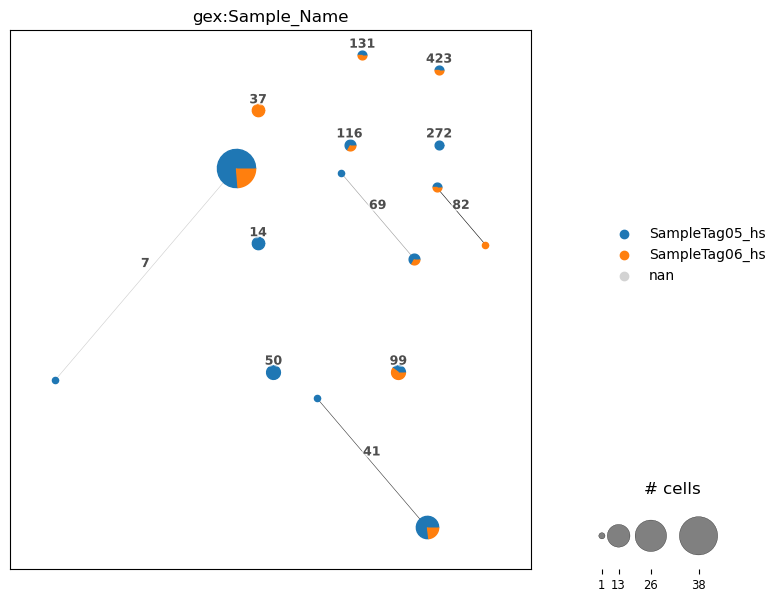

In [23]:
ir.tl.clonotype_network(mdata, min_cells=2, sequence="aa", metric="alignment")
_ = ir.pl.clonotype_network(mdata, color="gex:Sample_Name", label_fontsize=9, panel_size=(7, 7), base_size=20)

## Clonal expansion

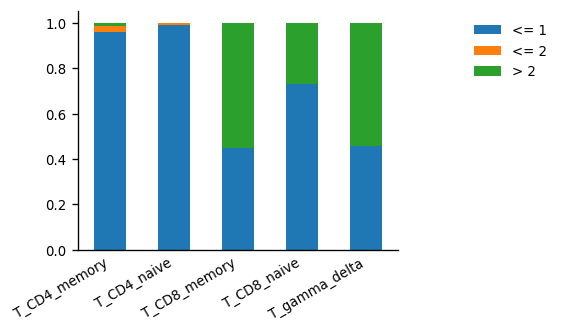

In [24]:
_ = ir.pl.clonal_expansion(mdata, target_col="clone_id", groupby="gex:Cell_Type_Experimental")

## Alpha diversity

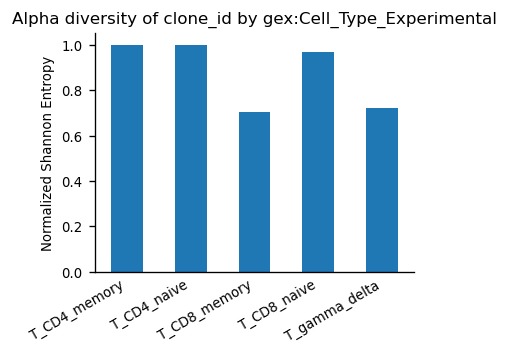

In [25]:
_ = ir.pl.alpha_diversity(mdata, metric="normalized_shannon_entropy", groupby="gex:Cell_Type_Experimental")

## Clonotype modularity

In [26]:
ir.tl.clonotype_modularity(mdata, target_col="airr:cc_aa_alignment")

100%|██████████| 1000/1000 [00:00<00:00, 3781.94it/s]


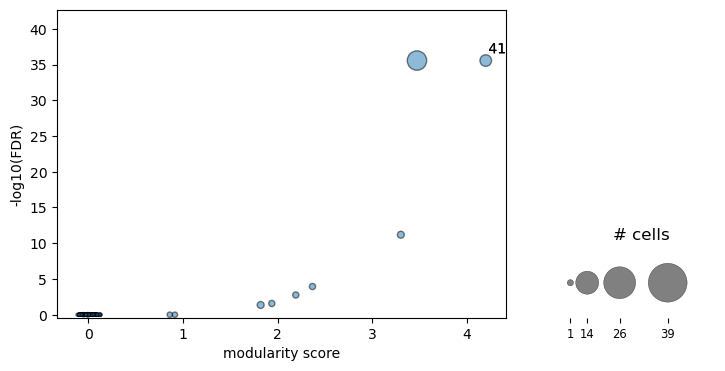

In [27]:
_ = ir.pl.clonotype_modularity(mdata, base_size=20)

### Extract information for clonotype 41:

In [28]:
clonotypes_top_modularity = list(
    mdata.obs.set_index("airr:cc_aa_alignment")["airr:clonotype_modularity"]
    .sort_values(ascending=False)
    .index.unique()
    .values[:1]
)

### Visualize in tSNE:

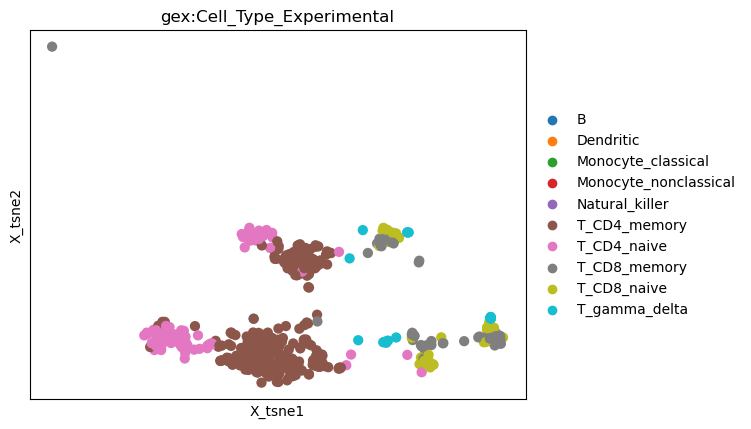

In [29]:
mu.pl.embedding(mdata, basis="gex:tsne", color=["gex:Cell_Type_Experimental"])

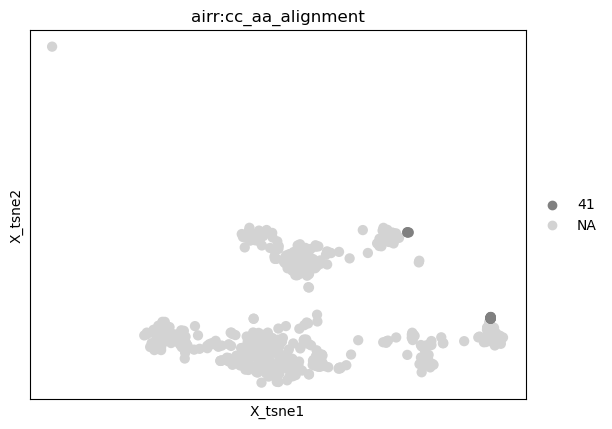

In [30]:
mu.pl.embedding(mdata, basis="gex:tsne", color="airr:cc_aa_alignment", groups=clonotypes_top_modularity)

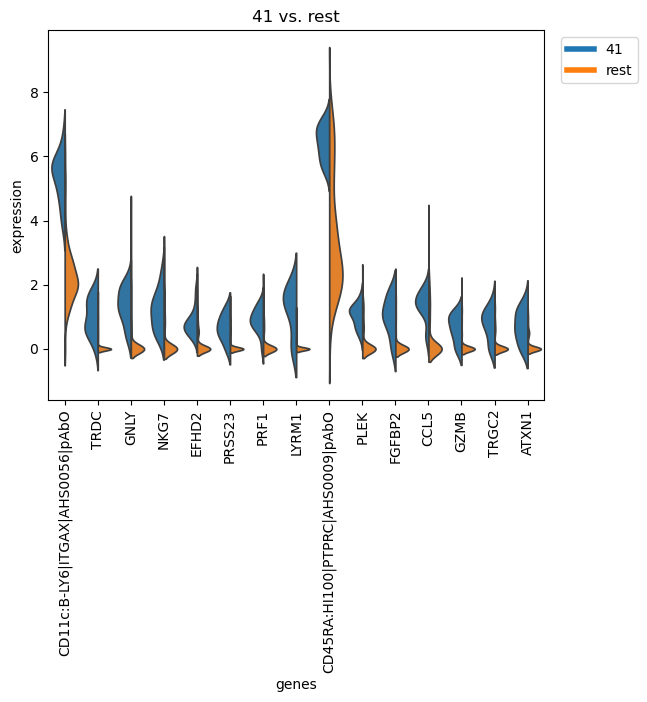

In [31]:
# Since sc.tl.rank_genes_group does not support MuData, we need to temporarily add
# the AIRR columns to the gene expression AnnData object
unique_groups = clonotypes_top_modularity + ["rest"]
colors = sns.color_palette("tab10", len(unique_groups))
group_colors = dict(zip(unique_groups, colors))
                    
with ir.get.obs_context(
    mdata["gex"], {"cc_aa_alignment": mdata.obs["airr:cc_aa_alignment"]}
) as tmp_ad:
    sc.tl.rank_genes_groups(
        tmp_ad,
        "cc_aa_alignment",
        groups=clonotypes_top_modularity,
        reference="rest",
        method="wilcoxon",
    )
    ax = sc.pl.rank_genes_groups_violin(
        tmp_ad, groups=clonotypes_top_modularity, n_genes=15, show=False, strip=False
    )

custom_handles = [
    Line2D([0], [0], color=group_colors[group], lw=4, label=group)
    for group in group_colors
]

plt.legend(handles=custom_handles, bbox_to_anchor=(1.02, 1), loc="upper left")
plt.show()

## Marker genes in clonotypes

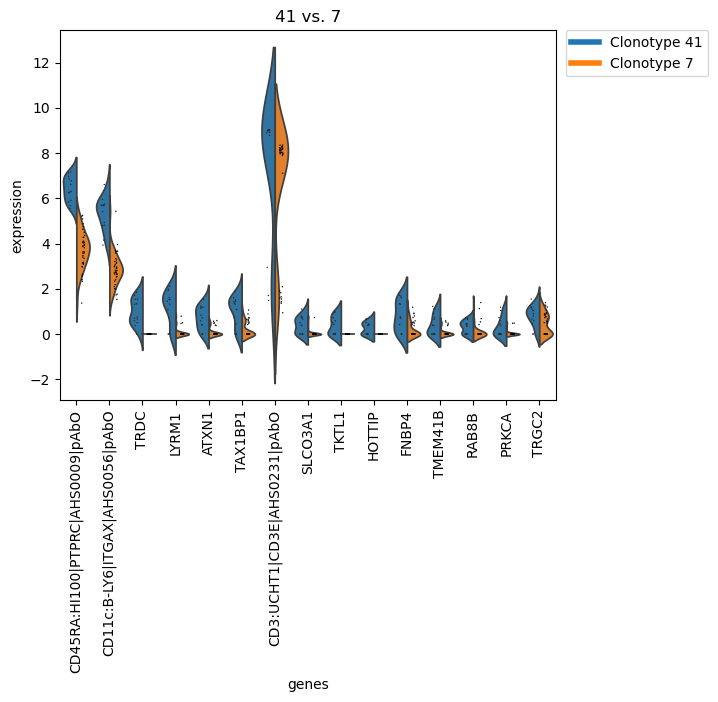

In [32]:
with ir.get.obs_context(mdata["gex"], {"clone_id": mdata.obs["airr:clone_id"]}) as tmp_ad:
    sc.tl.rank_genes_groups(tmp_ad, "clone_id", groups=["41"], reference="7", method="wilcoxon")
    groups = tmp_ad.uns['rank_genes_groups']['names'].dtype.names 
    sc.pl.rank_genes_groups_violin(tmp_ad, groups=groups[0], n_genes=15, show=False)

# manually add legend as this is not supported by scanpy pl.rank_genes_groups_violin
colors = sns.color_palette("tab10", 2)
custom_legend = [
    Line2D([0], [0], color=colors[0], lw=4, label="Clonotype 41"),
    Line2D([0], [0], color=colors[1], lw=4, label="Clonotype 7"),
]

plt.legend(handles=custom_legend, loc="upper left", bbox_to_anchor=(1.02,1), borderaxespad=0)
plt.show()

## Gene usage

Text(0, 0.5, 'Fraction of cells')

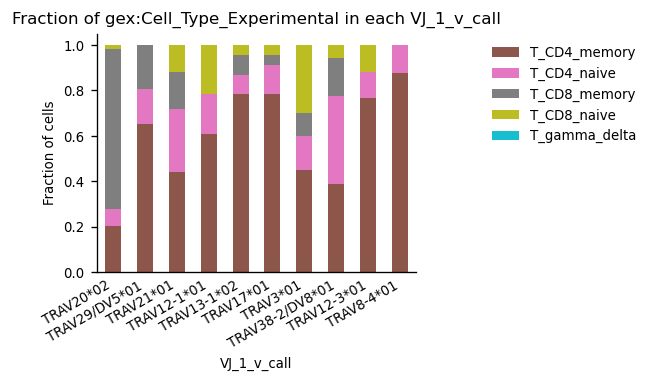

In [33]:
with ir.get.airr_context(mdata, "v_call"):
    ir.pl.group_abundance(
        mdata,
        groupby="VJ_1_v_call",
        target_col="gex:Cell_Type_Experimental",
        normalize=True,
        max_cols=10,
    )
plt.ylabel("Fraction of cells")

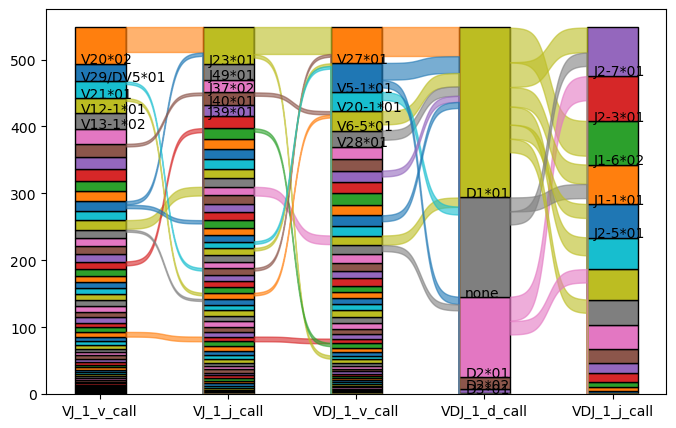

In [34]:
_ = ir.pl.vdj_usage(
    mdata,
    full_combination=False,
    fig_kws={"figsize": (8, 5)},
)

## Repertoire comparison

In [35]:
mdata

MuData object with n_obs × n_vars = 548 × 19556
  uns:	'clonotype_modularity'
  2 modalities
    gex:	548 x 19556
      obs:	'Cell_Type_Experimental', 'Sample_Tag', 'Sample_Name', 'SampleTag01_hs_Read_Count', 'SampleTag02_hs_Read_Count', 'SampleTag03_hs_Read_Count', 'SampleTag04_hs_Read_Count', 'SampleTag05_hs_Read_Count', 'SampleTag06_hs_Read_Count', 'SampleTag07_hs_Read_Count', 'SampleTag08_hs_Read_Count', 'SampleTag09_hs_Read_Count', 'SampleTag10_hs_Read_Count', 'SampleTag11_hs_Read_Count', 'SampleTag12_hs_Read_Count', 'Total_VDJ_Read_Count', 'Total_VDJ_Molecule_Count', 'BCR_Heavy_V_gene_Dominant', 'BCR_Heavy_D_gene_Dominant', 'BCR_Heavy_J_gene_Dominant', 'BCR_Heavy_C_gene_Dominant', 'BCR_Heavy_CDR3_Nucleotide_Dominant', 'BCR_Heavy_CDR3_Translation_Dominant', 'BCR_Heavy_Read_Count', 'BCR_Heavy_Molecule_Count', 'BCR_Light_V_gene_Dominant', 'BCR_Light_J_gene_Dominant', 'BCR_Light_C_gene_Dominant', 'BCR_Light_CDR3_Nucleotide_Dominant', 'BCR_Light_CDR3_Translation_Dominant', 'BCR_Light_Read_Count', 'BCR_Light_Molecule_Count', 'TCR_Alpha_Gamma_V_gene_Dominant', 'TCR_Alpha_Gamma_J_gene_Dominant', 'TCR_Alpha_Gamma_C_gene_Dominant', 'TCR_Alpha_Gamma_CDR3_Nucleotide_Dominant', 'TCR_Alpha_Gamma_CDR3_Translation_Dominant', 'TCR_Alpha_Gamma_Read_Count', 'TCR_Alpha_Gamma_Molecule_Count', 'TCR_Beta_Delta_V_gene_Dominant', 'TCR_Beta_Delta_D_gene_Dominant', 'TCR_Beta_Delta_J_gene_Dominant', 'TCR_Beta_Delta_C_gene_Dominant', 'TCR_Beta_Delta_CDR3_Nucleotide_Dominant', 'TCR_Beta_Delta_CDR3_Translation_Dominant', 'TCR_Beta_Delta_Read_Count', 'TCR_Beta_Delta_Molecule_Count', 'BCR_Paired_Chains', 'TCR_Paired_Chains', 'n_genes'
      var:	'Raw_Reads', 'Raw_Molecules', 'Raw_Seq_Depth', 'RSEC_Adjusted_Molecules', 'RSEC_Adjusted_Reads_non-singleton', 'RSEC_Adjusted_Molecules_non-singleton', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'Pipeline_Inputs', 'Pipeline_Metrics', 'Cell_Type_Experimental_colors', 'Sample_Name_colors', 'log1p', 'hvg', 'pca', 'neighbors', 'gex:Cell_Type_Experimental_colors', 'airr:cc_aa_alignment_colors', 'rank_genes_groups'
      obsm:	'X_tsne', 'X_pca'
      varm:	'PCs'
      obsp:	'distances', 'connectivities'
    airr:	548 x 0
      obs:	'receptor_type', 'receptor_subtype', 'chain_pairing', 'clone_id', 'clone_id_size', 'cc_aa_alignment', 'cc_aa_alignment_size', 'clonotype_modularity', 'clonotype_modularity_fdr'
      uns:	'scirpy_version', 'chain_indices', 'ir_dist_nt_identity', 'clone_id', 'clonotype_network', 'ir_dist_aa_alignment', 'cc_aa_alignment'
      obsm:	'airr', 'chain_indices', 'X_clonotype_network'

In [36]:
df, dst, lk = ir.tl.repertoire_overlap(mdata, "gex:Sample_Name", inplace=False)
df.head()

clone_id,0,1,2,3,4,5,6,7,8,9,...,467,468,469,470,471,472,473,474,475,476
gex:Sample_Name,,,,,,,,,,,,,,,,,,,,,
SampleTag05_hs,0.0,1.0,1.0,0.0,1.0,1.0,0.0,29.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
SampleTag06_hs,1.0,0.0,0.0,1.0,0.0,0.0,1.0,9.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [37]:
mdata

MuData object with n_obs × n_vars = 548 × 19556
  uns:	'clonotype_modularity'
  2 modalities
    gex:	548 x 19556
      obs:	'Cell_Type_Experimental', 'Sample_Tag', 'Sample_Name', 'SampleTag01_hs_Read_Count', 'SampleTag02_hs_Read_Count', 'SampleTag03_hs_Read_Count', 'SampleTag04_hs_Read_Count', 'SampleTag05_hs_Read_Count', 'SampleTag06_hs_Read_Count', 'SampleTag07_hs_Read_Count', 'SampleTag08_hs_Read_Count', 'SampleTag09_hs_Read_Count', 'SampleTag10_hs_Read_Count', 'SampleTag11_hs_Read_Count', 'SampleTag12_hs_Read_Count', 'Total_VDJ_Read_Count', 'Total_VDJ_Molecule_Count', 'BCR_Heavy_V_gene_Dominant', 'BCR_Heavy_D_gene_Dominant', 'BCR_Heavy_J_gene_Dominant', 'BCR_Heavy_C_gene_Dominant', 'BCR_Heavy_CDR3_Nucleotide_Dominant', 'BCR_Heavy_CDR3_Translation_Dominant', 'BCR_Heavy_Read_Count', 'BCR_Heavy_Molecule_Count', 'BCR_Light_V_gene_Dominant', 'BCR_Light_J_gene_Dominant', 'BCR_Light_C_gene_Dominant', 'BCR_Light_CDR3_Nucleotide_Dominant', 'BCR_Light_CDR3_Translation_Dominant', 'BCR_Light_Read_Count', 'BCR_Light_Molecule_Count', 'TCR_Alpha_Gamma_V_gene_Dominant', 'TCR_Alpha_Gamma_J_gene_Dominant', 'TCR_Alpha_Gamma_C_gene_Dominant', 'TCR_Alpha_Gamma_CDR3_Nucleotide_Dominant', 'TCR_Alpha_Gamma_CDR3_Translation_Dominant', 'TCR_Alpha_Gamma_Read_Count', 'TCR_Alpha_Gamma_Molecule_Count', 'TCR_Beta_Delta_V_gene_Dominant', 'TCR_Beta_Delta_D_gene_Dominant', 'TCR_Beta_Delta_J_gene_Dominant', 'TCR_Beta_Delta_C_gene_Dominant', 'TCR_Beta_Delta_CDR3_Nucleotide_Dominant', 'TCR_Beta_Delta_CDR3_Translation_Dominant', 'TCR_Beta_Delta_Read_Count', 'TCR_Beta_Delta_Molecule_Count', 'BCR_Paired_Chains', 'TCR_Paired_Chains', 'n_genes'
      var:	'Raw_Reads', 'Raw_Molecules', 'Raw_Seq_Depth', 'RSEC_Adjusted_Molecules', 'RSEC_Adjusted_Reads_non-singleton', 'RSEC_Adjusted_Molecules_non-singleton', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'Pipeline_Inputs', 'Pipeline_Metrics', 'Cell_Type_Experimental_colors', 'Sample_Name_colors', 'log1p', 'hvg', 'pca', 'neighbors', 'gex:Cell_Type_Experimental_colors', 'airr:cc_aa_alignment_colors', 'rank_genes_groups'
      obsm:	'X_tsne', 'X_pca'
      varm:	'PCs'
      obsp:	'distances', 'connectivities'
    airr:	548 x 0
      obs:	'receptor_type', 'receptor_subtype', 'chain_pairing', 'clone_id', 'clone_id_size', 'cc_aa_alignment', 'cc_aa_alignment_size', 'clonotype_modularity', 'clonotype_modularity_fdr'
      uns:	'scirpy_version', 'chain_indices', 'ir_dist_nt_identity', 'clone_id', 'clonotype_network', 'ir_dist_aa_alignment', 'cc_aa_alignment'
      obsm:	'airr', 'chain_indices', 'X_clonotype_network'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: title={'center': 'Repertoire overlap between SampleTag05_hs and SampleTag06_hs'}, xlabel='Clonotype size in SampleTag05_hs', ylabel='Clonotype size in SampleTag06_hs'>

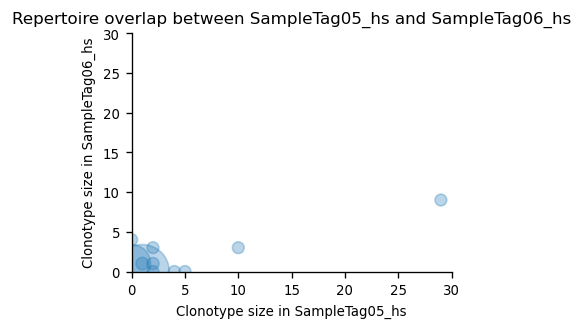

In [38]:
ir.pl.repertoire_overlap(mdata, "gex:Sample_Name", 
                         pair_to_plot=["SampleTag05_hs", "SampleTag06_hs"])

## Epitope specificity annotation

In [39]:
iedb = ir.datasets.iedb()

In [40]:
ir.pp.ir_dist(mdata, iedb, metric="identity", sequence="aa")
ir.tl.ir_query(
    mdata,
    iedb,
    metric="identity",
    sequence="aa",
    receptor_arms="any",
    dual_ir="any",
)

100%|██████████| 477/477 [00:00<00:00, 492.40it/s]


In [41]:
ir.tl.ir_query_annotate(
    mdata,
    iedb,
    metric="identity",
    sequence="aa",
    include_ref_cols=["Epitope Source Organism"],
    strategy="most-frequent",
)

100%|██████████| 71/71 [00:00<00:00, 3645.39it/s]


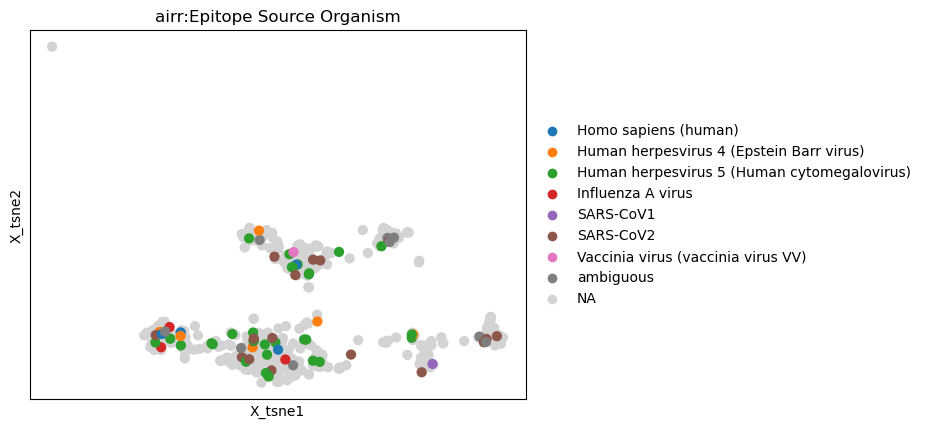

In [42]:
mu.pl.embedding(mdata, "gex:X_tsne", color="airr:Epitope Source Organism")